In [5]:
import matplotlib.pyplot as plt
import json
import argparse
import numpy as np
import seaborn as sns

from plot_graphs import plot_reward  

sns.set()
# plt.set
# plt.figure.

%matplotlib inline

dir_ = 'final/logs/'
final = dir_ + 'log_20191028_091337final.log'
final_memory_comp = dir_ + 'log_20191027_140342final_memory-comp.log'
final_disable_proposal = dir_ + 'log_20191029_191658final_disable-proposal.log'

In [17]:
def load_logs(filename):
    epoch  = []
    reward = []
    test_reward = []
    test_utterance = []
    with open(filename, 'r') as f:
        for n, line in enumerate(f):
                    if n == 0:
                        print(filename, line)
                        continue  # skip first line
                    line = line.strip()
                    if line == '':
                        continue
                    d = json.loads(line)
                    epoch.append(int(d['episode']))
                    reward.append(float(d['avg_reward_0']))
                    if 'test_reward' in d:
                        test_reward.append(d['test_reward'])
                    test_utterance.append(d['test_symbols_used'])
    return epoch, reward, test_reward, test_utterance


def extract_data(filename):
    epoch, reward, test_reward, test_utterance = load_logs(filename)

    test_utterance_per_position = [[{} for _ in range(6)] for _ in range(128)]
    for epoch in test_utterance:
        for trajectory in epoch:
            for i, utterance in enumerate(trajectory):
                for j, symbol in enumerate(utterance):
                    symbol = str(symbol)
                    if symbol in test_utterance_per_position[i][j]:
                        test_utterance_per_position[i][j][symbol] += 1
                    else:
                        test_utterance_per_position[i][j][symbol] = 1
    return test_utterance_per_position
    
    
def get_x_positions(inner_no, outer_no, width=2, inner_width=0.2, outer_width=0.5):
    """
    something is wrong with the way its interpreted by matplotlib
    """
    positions = []
    last = 0
    for i in range(outer_no):

        last += outer_width
        inner_positions = [last]

        for j in range(inner_no - 1):
            last += width + inner_width
            inner_positions.append(last)

        last += width + outer_width
        positions.append(inner_positions)
    return positions
        

def plot_utterance(data, utterance_idx=0):
    utterance_len = len(data[utterance_idx])
    labels = [str(i) for i in range(6)]
    width = 1.5
    fig, ax = plt.subplots()
    symbols = []
    for i in range(utterance_len):
        symbols_dict = data[utterance_idx][i]
        symbols_distribution = np.array(list(symbols_dict.values()))  # TODO make sure its in the right order!

        symbols_sum = sum(symbols_distribution)
        symbols.append(symbols_distribution / symbols_sum)
    symbols = np.array(symbols)
    reacts = []
    positions = get_x_positions(10, utterance_len)
    
    for i, symbol in enumerate(symbols):
        l = positions[i]
        reacts.append(ax.bar(l, symbol, width, label=str(i)))
        
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height.
        from: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py"""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    ax.set_ylabel('Occurance')
    ax.set_title('Symbols distribution in position')
#     ax.set_xticks(np.arange(labels))
    ax.set_xticklabels(labels)
    fig.tight_layout()
    
        

final/logs/log_20191028_091337final.log meta: {"enable_proposal": true, "enable_comms": true, "prosocial": true, "seed": null}

final/logs/log_20191027_140342final_memory-comp.log meta: {"enable_proposal": true, "enable_comms": true, "prosocial": true, "seed": null}

saving file


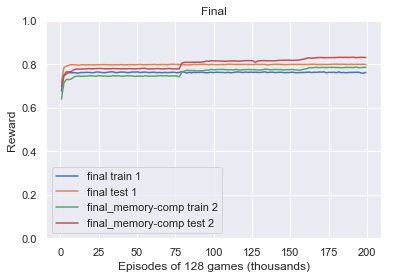

In [3]:

plot_reward(final+','+final_memory_comp, 0, 1, 'Final', 200000, 'final,final_memory-comp')

final/logs/log_20191029_191658final_disable-proposal.log meta: {"enable_proposal": false, "enable_comms": true, "prosocial": true, "seed": null}

saving file


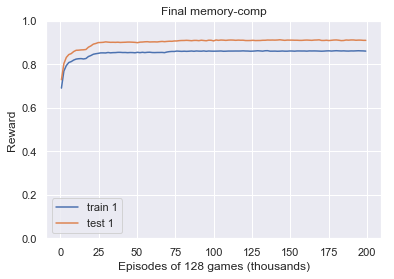

In [6]:
plot_reward(final_disable_proposal, 0, 1, 'Final memory-comp', 200000)

In [ ]:
x = test_utterance_per_position[1]
sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)


In [ ]:

#     for r in reacts:
#         print(r)
#         autolabel(r)
        
    

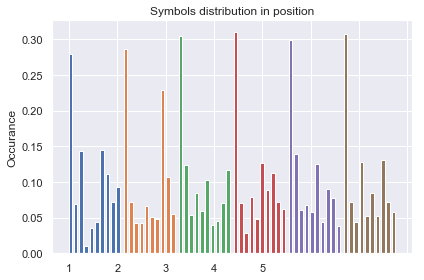

In [10]:
def plot_grams(filename):
    test_utterance_per_position = extract_data(filename)
    plot_utterance(test_utterance_per_position)

In [18]:
test_utterance_per_position = extract_data(final)

final/logs/log_20191028_091337final.log meta: {"enable_proposal": true, "enable_comms": true, "prosocial": true, "seed": null}

